In [ ]:
 pip install opencv-python opencv-python-headless tensorflow


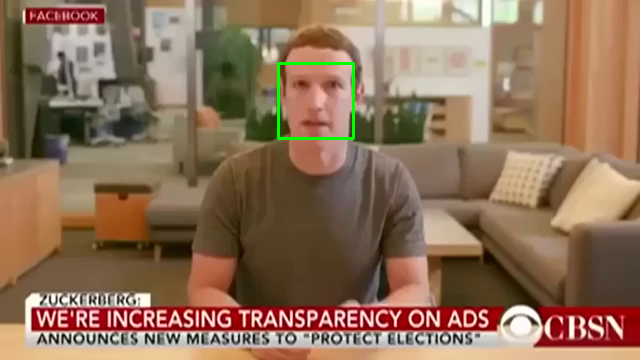

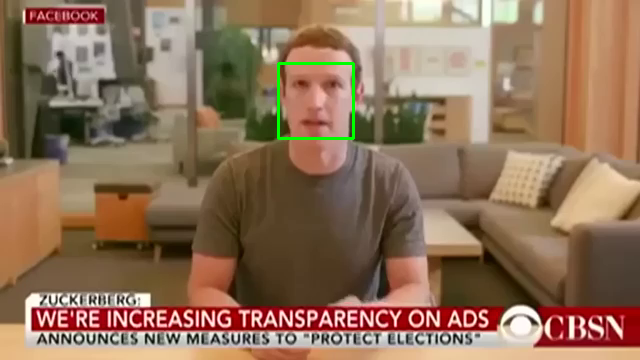

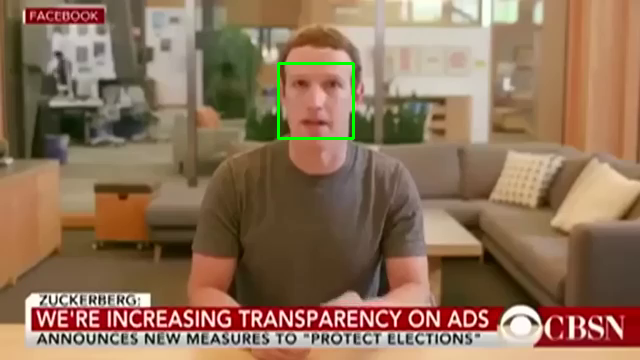

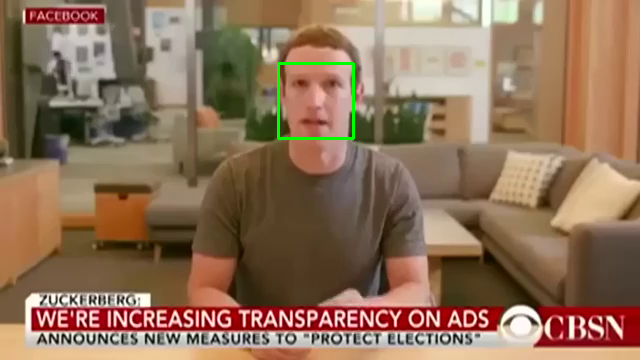

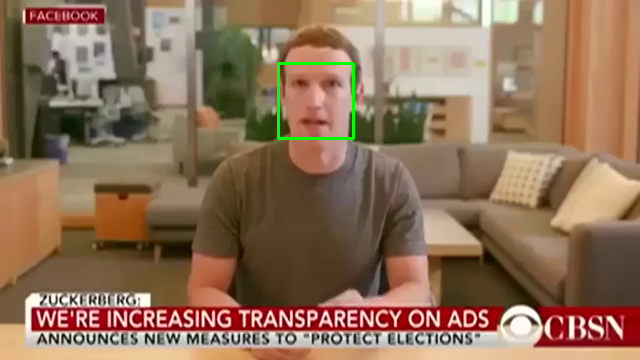

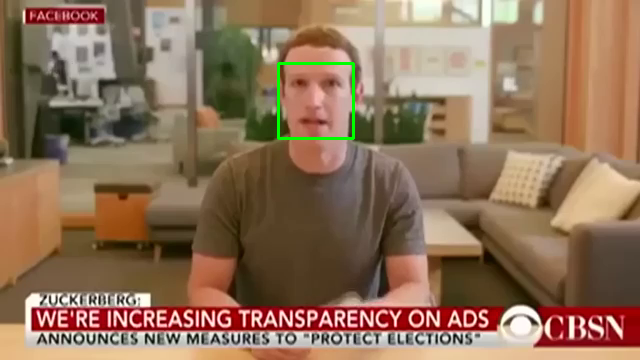

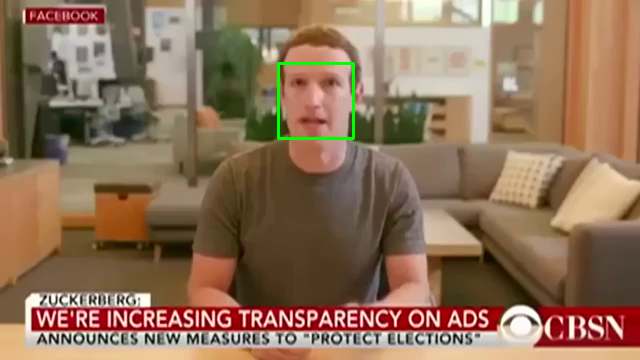

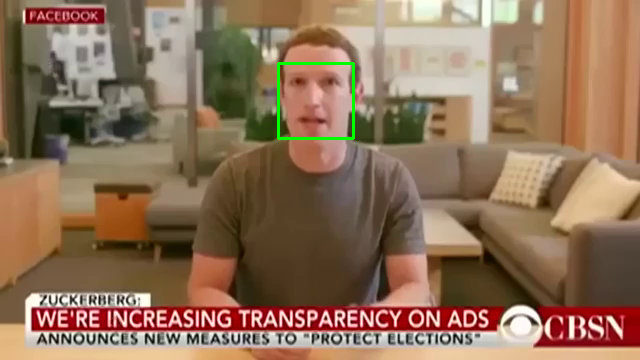

KeyboardInterrupt: 

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import dlib

def get_face_locations(image):
    detector = dlib.get_frontal_face_detector()
    faces = detector(image, 1)
    face_locations = [(face.left(), face.top(), face.right(), face.bottom()) for face in faces]
    return face_locations

def main(video_path):
    cap = cv2.VideoCapture(video_path)

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        face_locations = get_face_locations(frame)

        for (left, top, right, bottom) in face_locations:
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()

if __name__ == "__main__":
    video_path = "abc.mp4"
    main(video_path)


In [ ]:
import cv2
import torch
import torch.nn as nn
from google.colab.patches import cv2_imshow
import dlib

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dummy Model class (Replace this with your actual model)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.base = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(128 * 32 * 32, 512),  # Update the input size based on your architecture
            nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, x):
        return self.base(x)
    def forward(self, x):
        return self.base(x)

# Create an instance of your model
deepfake_model = MyModel()

# Load the state dictionary onto the model
model_state_dict = torch.load("F:\model_v0.pth", map_location=device)
# Adjust keys if needed or use strict=False to load a partial state dictionary
deepfake_model.load_state_dict(model_state_dict, strict=False)

# Set the model to evaluation mode
deepfake_model.eval()

def get_face_locations(image):
    detector = dlib.get_frontal_face_detector()
    faces = detector(image, 1)
    face_locations = [(face.left(), face.top(), face.right(), face.bottom()) for face in faces]
    return face_locations

def deepfake_detection(frame):
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (128, 128))  # Resize to the model's input size
    frame = frame / 255.0  # Normalize pixel values

    # Perform deepfake detection using the PyTorch model
    with torch.no_grad():
        # Assuming your model takes a tensor as input
        tensor_frame = torch.tensor(frame).unsqueeze(0).permute(0, 3, 1, 2).float()
        prediction = deepfake_model(tensor_frame).item()

    return prediction

def main(video_path):
    cap = cv2.VideoCapture(video_path)

    # Initialize counters for real and deepfake frames
    real_frame_count = 0
    deepfake_frame_count = 0

    # Loop through the video frames
    while cap.isOpened():
        ret, frame = cap.read()

        # Break the loop when the video ends
        if not ret:
            break

        # Ensure frame is not None
        if frame is None:
            continue

        face_locations = get_face_locations(frame)

        for (left, top, right, bottom) in face_locations:
            cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

        prediction = deepfake_detection(frame)

        # Define different thresholds for deepfake detection
        thresholds = [0.005, 0.006, 0.007]  # You can add more thresholds if needed

        # Classify the frame as real or deepfake for each threshold
        for threshold in thresholds:
            if -prediction >= threshold:
                deepfake_frame_count += 1
                print(f"Frame classified as deepfake")
                break  # Break the loop after the first threshold crossed
            else:
                real_frame_count += 1
                print(f"Frame classified as real")

        cv2_imshow(frame)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object
    cap.release()

    # Calculate the total number of frames
    total_frames = real_frame_count + deepfake_frame_count

    # Calculate the percentage of deepfake frames
    if total_frames > 0:
        percentage_deepfake = (deepfake_frame_count / total_frames) * 100
    else:
        percentage_deepfake = 0

    # Output the results
    print(f"Total frames: {total_frames}")
    print(f"Real frames: {real_frame_count}")
    print(f"Deepfake frames: {deepfake_frame_count}")
    print(f"Percentage of deepfake frames: {percentage_deepfake:.2f}%")

    # Close all OpenCV windows (if any)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    video_path = "abc.mp4"
    main(video_path)


FileNotFoundError: [Errno 2] No such file or directory: 'F:\\model_v0.pth'

In [ ]:
import cv2
import torch
import torch.nn as nn

# Assuming you have a class definition for your model (replace MyModel with your actual model class)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Modify the architecture based on your actual model
        self.base = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # Add more layers as needed
        )

        # Placeholder for final_input_size
        self.final_input_size = None  # To be determined dynamically

        # Initialize the Linear layer with a dummy size
        self.final_layer = nn.Linear(self.final_input_size or 1, 1)

    def forward(self, x):
        # Define the forward pass based on your model architecture
        x = self.base(x)
        # Add more forward pass operations as needed

        # Dynamically determine final_input_size during the first forward pass
        if self.final_input_size is None:
            self.final_input_size = x.reshape(x.size(0), -1).shape[1]
            # Reinitialize the Linear layer with the correct size
            self.final_layer = nn.Linear(self.final_input_size, 1)

        x = x.reshape(x.size(0), -1)  # Flatten the output before the final layer
        x = self.final_layer(x)
        return x.squeeze()  # Squeeze the output to a 1D tensor

# Create an instance of your model
deepfake_model = MyModel()

# Load the state dictionary onto the model
model_state_dict = torch.load("model_v0.pth", map_location=device)
# Adjust keys if needed or use strict=False to load a partial state dictionary
deepfake_model.load_state_dict(model_state_dict, strict=False)

# Set the model to evaluation mode
deepfake_model.eval()

# Load the video
video_path = "abc.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize counters for real and deepfake frames
real_frame_count = 0
deepfake_frame_count = 0

# Loop through the video frames
while True:
    ret, frame = cap.read()

    # Break the loop when the video ends
    if not ret:
        break

    # Ensure frame is not None
    if frame is None:
        continue

    # Preprocess the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (128, 128))  # Resize to the model's input size
    frame = frame / 255.0  # Normalize pixel values

    # Perform deepfake detection using the PyTorch model
    with torch.no_grad():
        # Assuming your model takes a tensor as input
        tensor_frame = torch.tensor(frame).unsqueeze(0).permute(0, 3, 1, 2).float()
        prediction = deepfake_model(tensor_frame).item()

    # Define a threshold for deepfake detection (you may need to fine-tune this)
    threshold = 0.05

    # Classify the frame as real or deepfake
    if prediction >= threshold:
        deepfake_frame_count += 1
    else:
        real_frame_count += 1

# Calculate the total number of frames
total_frames = real_frame_count + deepfake_frame_count

# Calculate the percentage of deepfake frames
percentage_deepfake = (deepfake_frame_count / total_frames) * 100

# Output the results
print(f"Total frames: {total_frames}")
print(f"Real frames: {real_frame_count}")
print(f"Deepfake frames: {deepfake_frame_count}")
print(f"Percentage of deepfake frames: {percentage_deepfake:.2f}%")

# Release the video capture object
cap.release()

# Close all OpenCV windows (if any)
cv2.destroyAllWindows()


Total frames: 1233
Real frames: 136
Deepfake frames: 1097
Percentage of deepfake frames: 88.97%


In [ ]:
import cv2
import torch
import torch.nn as nn

# Assuming you have a class definition for your model (replace MyModel with your actual model class)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Modify the architecture based on your actual model
        self.base = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # Add more layers as needed
        )

        # Placeholder for final_input_size
        self.final_input_size = None  # To be determined dynamically

        # Initialize the Linear layer with a dummy size
        self.final_layer = nn.Linear(self.final_input_size or 1, 1)

    def forward(self, x):
        # Define the forward pass based on your model architecture
        x = self.base(x)
        # Add more forward pass operations as needed

        # Dynamically determine final_input_size during the first forward pass
        if self.final_input_size is None:
            self.final_input_size = x.reshape(x.size(0), -1).shape[1]
            # Reinitialize the Linear layer with the correct size
            self.final_layer = nn.Linear(self.final_input_size, 1)

        x = x.reshape(x.size(0), -1)  # Flatten the output before the final layer
        x = self.final_layer(x)
        return x.squeeze()  # Squeeze the output to a 1D tensor

# Create an instance of your model
deepfake_model = MyModel()

# Load the state dictionary onto the model
model_state_dict = torch.load("model_v0.pth", map_location=device)
# Adjust keys if needed or use strict=False to load a partial state dictionary
deepfake_model.load_state_dict(model_state_dict, strict=False)

# Set the model to evaluation mode
deepfake_model.eval()

# Load the video
video_path = "a.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize counters for real and deepfake frames
real_frame_count = 0
deepfake_frame_count = 0

# Loop through the video frames
while True:
    ret, frame = cap.read()

    # Break the loop when the video ends
    if not ret:
        break

    # Ensure frame is not None
    if frame is None:
        continue

    # Preprocess the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (128, 128))  # Resize to the model's input size
    frame = frame / 255.0  # Normalize pixel values

    # Perform deepfake detection using the PyTorch model
    with torch.no_grad():
        # Assuming your model takes a tensor as input
        tensor_frame = torch.tensor(frame).unsqueeze(0).permute(0, 3, 1, 2).float()
        prediction = deepfake_model(tensor_frame).item()

    # Define a threshold for deepfake detection (you may need to fine-tune this)
    threshold = 0.05

    # Classify the frame as real or deepfake
    if prediction >= threshold:
        deepfake_frame_count += 1
    else:
        real_frame_count += 1

# Calculate the total number of frames
total_frames = real_frame_count + deepfake_frame_count

# Calculate the percentage of deepfake frames
percentage_deepfake = (deepfake_frame_count / total_frames) * 100

# Output the results
print(f"Total frames: {total_frames}")
print(f"Real frames: {real_frame_count}")
print(f"Deepfake frames: {deepfake_frame_count}")
print(f"Percentage of deepfake frames: {percentage_deepfake:.2f}%")

# Release the video capture object
cap.release()

# Close all OpenCV windows (if any)
cv2.destroyAllWindows()


Total frames: 1717
Real frames: 3
Deepfake frames: 1714
Percentage of deepfake frames: 99.83%


In [ ]:
import cv2
import torch
import torch.nn as nn

# Assuming you have a class definition for your model (replace MyModel with your actual model class)
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Modify the architecture based on your actual model
        self.base = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            # Add more layers as needed
        )

        # Placeholder for final_input_size
        self.final_input_size = None  # To be determined dynamically

        # Initialize the Linear layer with a dummy size
        self.final_layer = nn.Linear(self.final_input_size or 1, 1)

    def forward(self, x):
        # Define the forward pass based on your model architecture
        x = self.base(x)
        # Add more forward pass operations as needed

        # Dynamically determine final_input_size during the first forward pass
        if self.final_input_size is None:
            self.final_input_size = x.reshape(x.size(0), -1).shape[1]
            # Reinitialize the Linear layer with the correct size
            self.final_layer = nn.Linear(self.final_input_size, 1)

        x = x.reshape(x.size(0), -1)  # Flatten the output before the final layer
        x = self.final_layer(x)
        return x.squeeze()  # Squeeze the output to a 1D tensor

# Create an instance of your model
deepfake_model = MyModel()

# Load the state dictionary onto the model
model_state_dict = torch.load("model_v0.pth", map_location=device)
# Adjust keys if needed or use strict=False to load a partial state dictionary
deepfake_model.load_state_dict(model_state_dict, strict=False)

# Set the model to evaluation mode
deepfake_model.eval()

# Load the video
video_path = "morgreal.mp4"
cap = cv2.VideoCapture(video_path)

# Initialize counters for real and deepfake frames
real_frame_count = 0
deepfake_frame_count = 0

# Loop through the video frames
while True:
    ret, frame = cap.read()

    # Break the loop when the video ends
    if not ret:
        break

    # Ensure frame is not None
    if frame is None:
        continue

    # Preprocess the frame
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (128, 128))  # Resize to the model's input size
    frame = frame / 255.0  # Normalize pixel values

    # Perform deepfake detection using the PyTorch model
    with torch.no_grad():
        # Assuming your model takes a tensor as input
        tensor_frame = torch.tensor(frame).unsqueeze(0).permute(0, 3, 1, 2).float()
        prediction = deepfake_model(tensor_frame).item()

    # Define a threshold for deepfake detection (you may need to fine-tune this)
    threshold = 0.05

    # Classify the frame as real or deepfake
    if prediction >= threshold:
        deepfake_frame_count += 1
    else:
        real_frame_count += 1

# Calculate the total number of frames
total_frames = real_frame_count + deepfake_frame_count

# Calculate the percentage of deepfake frames
percentage_deepfake = (deepfake_frame_count / total_frames) * 100

# Output the results
print(f"Total frames: {total_frames}")
print(f"Real frames: {real_frame_count}")
print(f"Deepfake frames: {deepfake_frame_count}")
print(f"Percentage of deepfake frames: {percentage_deepfake:.2f}%")

# Release the video capture object
cap.release()

# Close all OpenCV windows (if any)
cv2.destroyAllWindows()
